# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon Mar  9 08:58:17 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


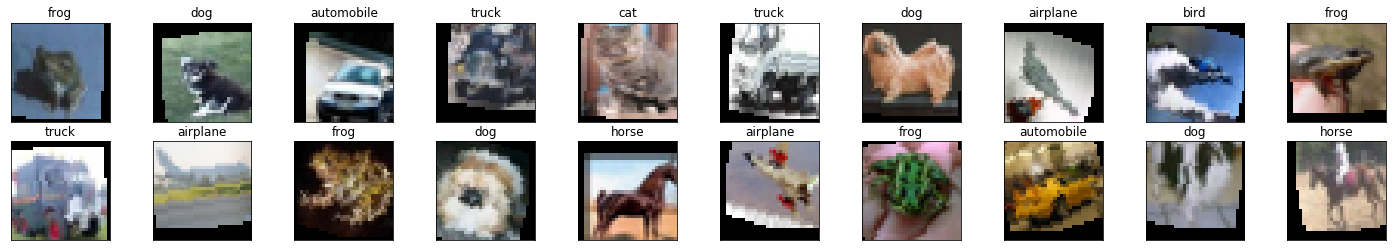

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0)
# scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
#                                         verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 51
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
#     scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.1460894346237183 Batch_id=390 Accuracy=45.02: 100%|██████████| 391/391 [00:49<00:00,  7.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 5676/10000 (56.76%)

Validation accuracy increased (0.000000 --> 56.760000).  Saving model ...
Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=1.208117127418518 Batch_id=390 Accuracy=61.88: 100%|██████████| 391/391 [00:50<00:00,  7.77it/s] 



Test set: Average loss: 0.0072, Accuracy: 6868/10000 (68.68%)

Validation accuracy increased (56.760000 --> 68.680000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.8888750076293945 Batch_id=390 Accuracy=68.91: 100%|██████████| 391/391 [00:51<00:00,  7.66it/s]



Test set: Average loss: 0.0064, Accuracy: 7193/10000 (71.93%)

Validation accuracy increased (68.680000 --> 71.930000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.6908919215202332 Batch_id=390 Accuracy=73.24: 100%|██████████| 391/391 [00:53<00:00,  7.37it/s]



Test set: Average loss: 0.0051, Accuracy: 7825/10000 (78.25%)

Validation accuracy increased (71.930000 --> 78.250000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.448140949010849 Batch_id=390 Accuracy=76.20: 100%|██████████| 391/391 [00:56<00:00,  6.94it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7619/10000 (76.19%)

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.7443463206291199 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [00:58<00:00,  6.65it/s] 



Test set: Average loss: 0.0047, Accuracy: 8064/10000 (80.64%)

Validation accuracy increased (78.250000 --> 80.640000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.728946328163147 Batch_id=390 Accuracy=80.12: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]  



Test set: Average loss: 0.0040, Accuracy: 8318/10000 (83.18%)

Validation accuracy increased (80.640000 --> 83.180000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.49896344542503357 Batch_id=390 Accuracy=81.71: 100%|██████████| 391/391 [00:59<00:00,  6.56it/s]



Test set: Average loss: 0.0037, Accuracy: 8414/10000 (84.14%)

Validation accuracy increased (83.180000 --> 84.140000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.5497376322746277 Batch_id=390 Accuracy=82.68: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8299/10000 (82.99%)

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.5509365200996399 Batch_id=390 Accuracy=83.62: 100%|██████████| 391/391 [01:00<00:00,  6.50it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8327/10000 (83.27%)

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.5742529630661011 Batch_id=390 Accuracy=84.63: 100%|██████████| 391/391 [01:02<00:00,  6.28it/s] 



Test set: Average loss: 0.0037, Accuracy: 8480/10000 (84.80%)

Validation accuracy increased (84.140000 --> 84.800000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  12
EPOCH: 12


Loss=0.2592635452747345 Batch_id=390 Accuracy=85.37: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s] 



Test set: Average loss: 0.0033, Accuracy: 8634/10000 (86.34%)

Validation accuracy increased (84.800000 --> 86.340000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  13
EPOCH: 13


Loss=0.4966427683830261 Batch_id=390 Accuracy=86.05: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8280/10000 (82.80%)

Learning rate = 0.01  for epoch:  14
EPOCH: 14


Loss=0.22817008197307587 Batch_id=390 Accuracy=86.86: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]



Test set: Average loss: 0.0031, Accuracy: 8667/10000 (86.67%)

Validation accuracy increased (86.340000 --> 86.670000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  15
EPOCH: 15


Loss=0.22636456787586212 Batch_id=390 Accuracy=87.03: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]



Test set: Average loss: 0.0032, Accuracy: 8682/10000 (86.82%)

Validation accuracy increased (86.670000 --> 86.820000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  16
EPOCH: 16


Loss=0.44998741149902344 Batch_id=390 Accuracy=87.83: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]



Test set: Average loss: 0.0031, Accuracy: 8698/10000 (86.98%)

Validation accuracy increased (86.820000 --> 86.980000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  17
EPOCH: 17


Loss=0.48299479484558105 Batch_id=390 Accuracy=88.13: 100%|██████████| 391/391 [01:04<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8645/10000 (86.45%)

Learning rate = 0.01  for epoch:  18
EPOCH: 18


Loss=0.32981738448143005 Batch_id=390 Accuracy=88.72: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]



Test set: Average loss: 0.0029, Accuracy: 8808/10000 (88.08%)

Validation accuracy increased (86.980000 --> 88.080000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  19
EPOCH: 19


Loss=0.5582038760185242 Batch_id=390 Accuracy=89.19: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8787/10000 (87.87%)

Learning rate = 0.01  for epoch:  20
EPOCH: 20


Loss=0.26404571533203125 Batch_id=390 Accuracy=89.62: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]



Test set: Average loss: 0.0028, Accuracy: 8882/10000 (88.82%)

Validation accuracy increased (88.080000 --> 88.820000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  21
EPOCH: 21


Loss=0.26651835441589355 Batch_id=390 Accuracy=90.10: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8836/10000 (88.36%)

Learning rate = 0.01  for epoch:  22
EPOCH: 22


Loss=0.31904223561286926 Batch_id=390 Accuracy=90.29: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8872/10000 (88.72%)

Learning rate = 0.01  for epoch:  23
EPOCH: 23


Loss=0.1768156737089157 Batch_id=390 Accuracy=90.47: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s] 



Test set: Average loss: 0.0028, Accuracy: 8905/10000 (89.05%)

Validation accuracy increased (88.820000 --> 89.050000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  24
EPOCH: 24


Loss=0.24440355598926544 Batch_id=390 Accuracy=90.92: 100%|██████████| 391/391 [01:07<00:00,  5.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8848/10000 (88.48%)

Learning rate = 0.01  for epoch:  25
EPOCH: 25


Loss=0.33612364530563354 Batch_id=390 Accuracy=91.05: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]



Test set: Average loss: 0.0026, Accuracy: 8980/10000 (89.80%)

Validation accuracy increased (89.050000 --> 89.800000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  26
EPOCH: 26


Loss=0.2667098641395569 Batch_id=390 Accuracy=91.74: 100%|██████████| 391/391 [01:07<00:00,  5.76it/s] 



Test set: Average loss: 0.0027, Accuracy: 9000/10000 (90.00%)

Validation accuracy increased (89.800000 --> 90.000000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  27
EPOCH: 27


Loss=0.33643051981925964 Batch_id=390 Accuracy=91.96: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8836/10000 (88.36%)

Learning rate = 0.01  for epoch:  28
EPOCH: 28


Loss=0.2732751667499542 Batch_id=390 Accuracy=92.10: 100%|██████████| 391/391 [01:16<00:00,  5.11it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8878/10000 (88.78%)

Learning rate = 0.01  for epoch:  29
EPOCH: 29


Loss=0.2549213767051697 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [01:13<00:00,  5.29it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8932/10000 (89.32%)

Learning rate = 0.01  for epoch:  30
EPOCH: 30


Loss=0.1699630320072174 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8967/10000 (89.67%)

Learning rate = 0.01  for epoch:  31
EPOCH: 31


Loss=0.20591244101524353 Batch_id=390 Accuracy=92.86: 100%|██████████| 391/391 [01:11<00:00,  5.44it/s]



Test set: Average loss: 0.0026, Accuracy: 9005/10000 (90.05%)

Validation accuracy increased (90.000000 --> 90.050000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  32
EPOCH: 32


Loss=0.2415810078382492 Batch_id=390 Accuracy=92.89: 100%|██████████| 391/391 [01:09<00:00,  5.59it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8939/10000 (89.39%)

Learning rate = 0.01  for epoch:  33
EPOCH: 33


Loss=0.1945229321718216 Batch_id=390 Accuracy=93.28: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8964/10000 (89.64%)

Learning rate = 0.01  for epoch:  34
EPOCH: 34


Loss=0.15230664610862732 Batch_id=390 Accuracy=93.37: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]



Test set: Average loss: 0.0027, Accuracy: 9052/10000 (90.52%)

Validation accuracy increased (90.050000 --> 90.520000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  35
EPOCH: 35


Loss=0.08000438660383224 Batch_id=390 Accuracy=93.84: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s]



Test set: Average loss: 0.0026, Accuracy: 9056/10000 (90.56%)

Validation accuracy increased (90.520000 --> 90.560000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  36
EPOCH: 36


Loss=0.1915551871061325 Batch_id=390 Accuracy=93.81: 100%|██████████| 391/391 [01:10<00:00,  5.53it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9051/10000 (90.51%)

Learning rate = 0.01  for epoch:  37
EPOCH: 37


Loss=0.28899532556533813 Batch_id=390 Accuracy=94.09: 100%|██████████| 391/391 [01:10<00:00,  5.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9054/10000 (90.54%)

Learning rate = 0.01  for epoch:  38
EPOCH: 38


Loss=0.1561354398727417 Batch_id=390 Accuracy=94.40: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9030/10000 (90.30%)

Learning rate = 0.01  for epoch:  39
EPOCH: 39


Loss=0.28255248069763184 Batch_id=390 Accuracy=94.09: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s]



Test set: Average loss: 0.0025, Accuracy: 9106/10000 (91.06%)

Validation accuracy increased (90.560000 --> 91.060000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  40
EPOCH: 40


Loss=0.1367795169353485 Batch_id=390 Accuracy=94.46: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9104/10000 (91.04%)

Learning rate = 0.01  for epoch:  41
EPOCH: 41


Loss=0.09995445609092712 Batch_id=390 Accuracy=94.56: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9045/10000 (90.45%)

Learning rate = 0.01  for epoch:  42
EPOCH: 42


Loss=0.05594019219279289 Batch_id=390 Accuracy=94.64: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9032/10000 (90.32%)

Learning rate = 0.01  for epoch:  43
EPOCH: 43


Loss=0.11881361901760101 Batch_id=390 Accuracy=94.98: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9073/10000 (90.73%)

Learning rate = 0.01  for epoch:  44
EPOCH: 44


Loss=0.04591326043009758 Batch_id=390 Accuracy=95.14: 100%|██████████| 391/391 [01:07<00:00,  5.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9097/10000 (90.97%)

Learning rate = 0.01  for epoch:  45
EPOCH: 45


Loss=0.06337161362171173 Batch_id=390 Accuracy=95.29: 100%|██████████| 391/391 [01:09<00:00,  5.67it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9088/10000 (90.88%)

Learning rate = 0.01  for epoch:  46
EPOCH: 46


Loss=0.08226278424263 Batch_id=390 Accuracy=95.31: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]    
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9039/10000 (90.39%)

Learning rate = 0.01  for epoch:  47
EPOCH: 47


Loss=0.15933363139629364 Batch_id=390 Accuracy=95.48: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s] 



Test set: Average loss: 0.0026, Accuracy: 9114/10000 (91.14%)

Validation accuracy increased (91.060000 --> 91.140000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  48
EPOCH: 48


Loss=0.06910894066095352 Batch_id=390 Accuracy=95.55: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9091/10000 (90.91%)

Learning rate = 0.01  for epoch:  49
EPOCH: 49


Loss=0.10769857466220856 Batch_id=390 Accuracy=95.86: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9104/10000 (91.04%)

Learning rate = 0.01  for epoch:  50
EPOCH: 50


Loss=0.10970081388950348 Batch_id=390 Accuracy=95.92: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s] 



Test set: Average loss: 0.0028, Accuracy: 9111/10000 (91.11%)

Learning rate = 0.01  for epoch:  51


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 86% (3460/4007)
Test Accuracy of automobile: 92% (3732/4014)
Test Accuracy of  bird: 82% (3233/3905)
Test Accuracy of   cat: 74% (2892/3896)
Test Accuracy of  deer: 86% (3406/3940)
Test Accuracy of   dog: 81% (3185/3922)
Test Accuracy of  frog: 88% (3532/3984)
Test Accuracy of horse: 88% (3536/3987)
Test Accuracy of  ship: 92% (3651/3934)
Test Accuracy of truck: 91% (3597/3911)

Test Accuracy (Overall): 86% (34224/39500)


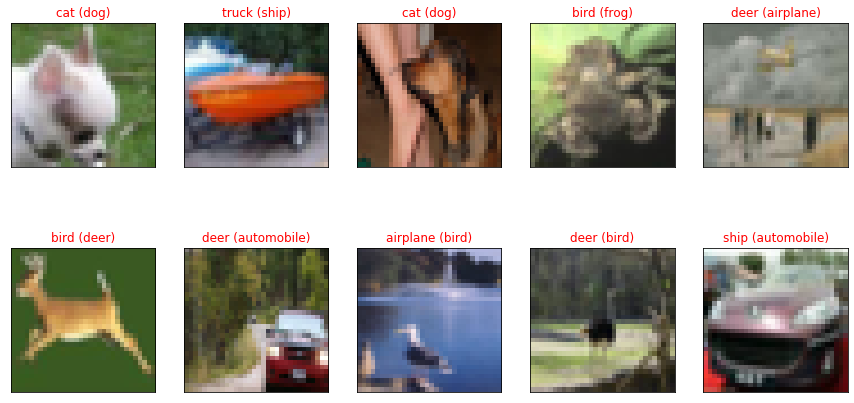

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

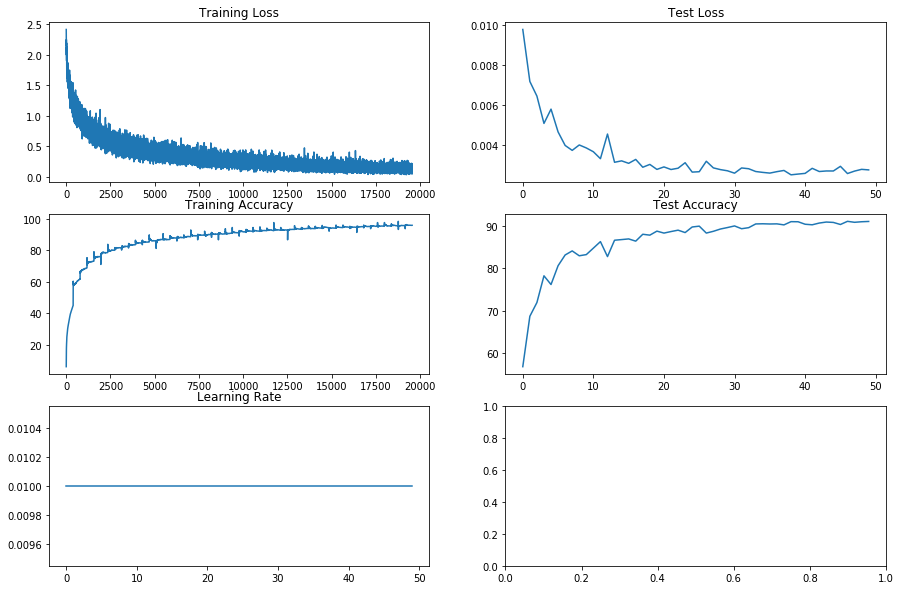

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [16]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)